In [ ]:

import pandas as pd



student_vle = pd.read_csv("studentVle.csv")
vle = pd.read_csv("vle.csv")

activity_weights = {
    'resource': 2,
    'oucontent': 3,
    'homepage': 1,
    'url': 1.5,
    'subpage': 2.5
}

vle['weight'] = vle['activity_type'].map(activity_weights)

merged_df = pd.merge(student_vle, vle[['id_site', 'weight']], on='id_site', how='left')

merged_df['weight'] = merged_df['weight'].fillna(0)

merged_df['xp'] = merged_df['sum_click'] * merged_df['weight']

xp_df = merged_df.groupby(['code_module', 'code_presentation', 'id_student'])['xp'].sum().reset_index()
xp_df.rename(columns={'xp': 'total_xp'}, inplace=True)

xp_df.head()

# here we assign weights to activity types to give them points
# as we have to Map activity_type to weight in vle so
# merging student interactions with vle to get weight
# this is for Filling missing weights with 0 
# here we will now Compute XP = sum_click × weight
# here we are Aggregating total XP per student 


,code_module,code_presentation,id_student,total_xp
0,AAA,2013J,11391,1910.5
1,AAA,2013J,28400,2248.5
2,AAA,2013J,30268,326.0
3,AAA,2013J,31604,3473.0
4,AAA,2013J,32885,1994.5


In [ ]:

merged_df['week'] = (merged_df['date'] // 8).clip(lower=0).astype(int)

weekly_xp_df = merged_df.groupby(['code_module', 'code_presentation', 'id_student', 'week'])['xp'].sum().reset_index()

weekly_xp_df.sort_values(by=['id_student', 'week']).head(50)



#  Weekly XP activity timelines per student.
# Creating 'week' column from 'date' (each week = 7 days, clip negatives to 0)
# Step 2.2: Aggregate XP per student per week


,code_module,code_presentation,id_student,week,xp
9165,AAA,2014J,6516,0,830.0
9166,AAA,2014J,6516,1,62.0
9167,AAA,2014J,6516,2,249.0
9168,AAA,2014J,6516,3,484.5
9169,AAA,2014J,6516,4,83.5
9170,AAA,2014J,6516,5,12.5
9171,AAA,2014J,6516,6,154.0
9172,AAA,2014J,6516,7,112.0
9173,AAA,2014J,6516,8,72.5
9174,AAA,2014J,6516,9,299.0


In [ ]:

xp_pivot_df = weekly_xp_df.pivot_table(
    index=['code_module', 'code_presentation', 'id_student'],
    columns='week',
    values='xp',
    fill_value=0
)

xp_pivot_df.columns = [f'xp_week_{int(col)}' for col in xp_pivot_df.columns]

xp_pivot_df = xp_pivot_df.reset_index()


xp_pivot_df.head(10)



# making the weekly XP data to wide format
# here we did the Renaming of columns to xp_week_0, xp_week_1, ...
# Reset index to flatten the DataFrame


,code_module,code_presentation,id_student,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,xp_week_5,xp_week_6,...,xp_week_24,xp_week_25,xp_week_26,xp_week_27,xp_week_28,xp_week_29,xp_week_30,xp_week_31,xp_week_32,xp_week_33
0,AAA,2013J,11391,704.0,57.5,171.5,51.5,95.5,5.0,52.0,...,2.0,0.0,102.0,52.0,1.0,0.0,247.0,1.0,0.0,0.0
1,AAA,2013J,28400,533.5,59.5,110.0,180.5,9.0,8.0,37.0,...,8.0,1.0,181.5,2.0,4.0,1.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,276.5,49.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,374.5,200.0,202.0,155.5,182.0,114.5,93.0,...,49.0,1.0,61.5,44.5,75.0,1.0,56.5,4.0,2.0,1.0
4,AAA,2013J,32885,568.0,286.5,164.0,28.5,92.0,0.0,0.0,...,1.0,10.5,0.0,91.0,74.5,24.0,7.5,0.0,0.0,0.0
5,AAA,2013J,38053,420.0,179.0,169.0,16.5,72.5,95.0,54.0,...,39.0,121.5,25.0,1020.0,63.0,69.0,33.0,4.0,2.0,4.0
6,AAA,2013J,45462,576.0,0.0,451.5,281.0,88.0,0.0,121.0,...,97.5,142.0,91.0,1.0,0.0,0.0,329.0,3.0,0.0,1.0
7,AAA,2013J,45642,74.5,136.0,265.5,89.5,31.0,55.0,99.0,...,32.5,41.0,45.5,65.0,187.0,98.5,9.5,3.0,2.0,1.0
8,AAA,2013J,52130,76.5,54.5,440.5,111.5,60.0,65.5,151.5,...,147.0,72.5,207.0,242.0,135.5,29.5,49.0,0.0,0.0,0.0
9,AAA,2013J,53025,390.0,175.5,61.5,18.0,34.0,0.0,74.5,...,12.0,2.0,32.5,2.0,3.0,3.0,10.0,2.0,1.0,0.0


In [ ]:
import pandas as pd

student_assessment = pd.read_csv("studentAssessment.csv")

avg_score_df = student_assessment.groupby('id_student')['score'].mean().reset_index()
avg_score_df.rename(columns={'score': 'final_score'}, inplace=True)

xp_features_df = pd.merge(
    xp_pivot_df,
    avg_score_df[['id_student', 'final_score']],
    on='id_student',
    how='left'
)

xp_features_df['label'] = xp_features_df['final_score'].apply(
    lambda x: 'A' if 65 <= x <= 100 else
              'B' if 30 <= x < 65 else
              'C' if 0 <= x < 30 else
              'D'
)

xp_features_df.head(20)



# Load the studentAssessment data
# Compute average score per student
# Merge with xp_pivot_df (which must have 'id_student')
# Assign label based on final_score
# Preview result

,code_module,code_presentation,id_student,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,xp_week_5,xp_week_6,...,xp_week_26,xp_week_27,xp_week_28,xp_week_29,xp_week_30,xp_week_31,xp_week_32,xp_week_33,final_score,label
0,AAA,2013J,11391,704.0,57.5,171.5,51.5,95.5,5.0,52.0,...,102.0,52.0,1.0,0.0,247.0,1.0,0.0,0.0,82.0,A
1,AAA,2013J,28400,533.5,59.5,110.0,180.5,9.0,8.0,37.0,...,181.5,2.0,4.0,1.0,0.0,0.0,0.0,0.0,66.4,A
2,AAA,2013J,30268,276.5,49.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,D
3,AAA,2013J,31604,374.5,200.0,202.0,155.5,182.0,114.5,93.0,...,61.5,44.5,75.0,1.0,56.5,4.0,2.0,1.0,76.0,A
4,AAA,2013J,32885,568.0,286.5,164.0,28.5,92.0,0.0,0.0,...,0.0,91.0,74.5,24.0,7.5,0.0,0.0,0.0,54.4,B
5,AAA,2013J,38053,420.0,179.0,169.0,16.5,72.5,95.0,54.0,...,25.0,1020.0,63.0,69.0,33.0,4.0,2.0,4.0,68.0,A
6,AAA,2013J,45462,576.0,0.0,451.5,281.0,88.0,0.0,121.0,...,91.0,1.0,0.0,0.0,329.0,3.0,0.0,1.0,68.0,A
7,AAA,2013J,45642,74.5,136.0,265.5,89.5,31.0,55.0,99.0,...,45.5,65.0,187.0,98.5,9.5,3.0,2.0,1.0,72.4,A
8,AAA,2013J,52130,76.5,54.5,440.5,111.5,60.0,65.5,151.5,...,207.0,242.0,135.5,29.5,49.0,0.0,0.0,0.0,71.4,A
9,AAA,2013J,53025,390.0,175.5,61.5,18.0,34.0,0.0,74.5,...,32.5,2.0,3.0,3.0,10.0,2.0,1.0,0.0,78.0,A


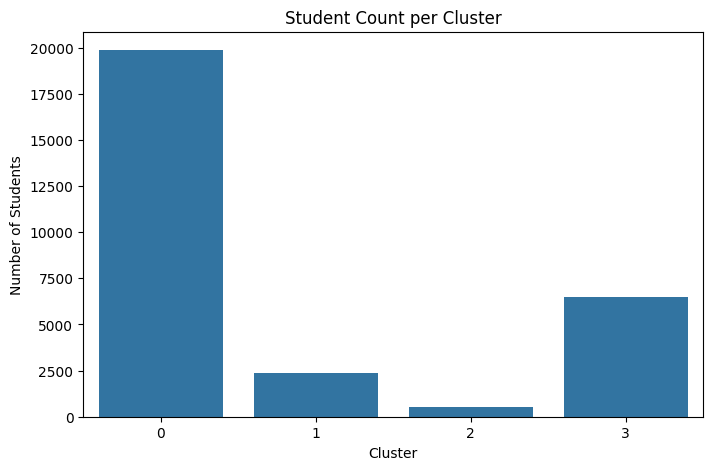

In [ ]:
# KMeans Clustering on XP Features

xp_weekly_features = xp_features_df[[f'xp_week_{i}' for i in range(33)]]


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

xp_weekly_features = xp_weekly_features.fillna(0)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(xp_weekly_features)

xp_features_df['cluster'] = clusters


plt.figure(figsize=(8, 5))
sns.countplot(x=xp_features_df['cluster'])
plt.title("Student Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Students")
plt.show()





# Select weekly XP features: columns 0 to 38 (for weeks 0–38)
# filling missing values if any
# Step 1: Try k=4 as per the paper
# Step 2: Add the cluster labels to your main dataframe
# Step 3: Visualize the clusters (optional)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

xp_columns = [col for col in xp_features_df.columns if col.startswith('xp_week_')]
X = xp_features_df[xp_columns].copy()
y = xp_features_df['cluster'].copy()

cluster_sizes = Counter(y)
Lb = max(cluster_sizes.values())  # Largest cluster size
Ls = min(cluster_sizes.values())  # Smallest cluster size
n = max(1, Ls - 1)  # SMOTE k_neighbors

print("Cluster sizes before balancing:", cluster_sizes)
print(f"Largest Cluster (Lb): {Lb}, Smallest Cluster (Ls): {Ls}, n: {n}")

sampling_strategy = {label: Lb for label, count in cluster_sizes.items() if count < Lb}

smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=n, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

balanced_df = pd.DataFrame(X_balanced, columns=xp_columns)
balanced_df['cluster'] = y_balanced

new_cluster_sizes = Counter(y_balanced)
print("Cluster sizes after balancing:", new_cluster_sizes)




# Step 1: Extract XP features and cluster labels
# Step 2: Compute sizes
# Step 3: Custom sampling strategy — only oversample minority clusters to match Lb
# Step 4: Apply SMOTE only on minority clusters
# Step 5: Combine into a balanced DataFrame
# Step 6: Check new sizes

Cluster sizes before balancing: Counter({0: 19869, 3: 6472, 1: 2346, 2: 541})
Largest Cluster (Lb): 19869, Smallest Cluster (Ls): 541, n: 540
Cluster sizes after balancing: Counter({3: 19869, 0: 19869, 1: 19869, 2: 19869})


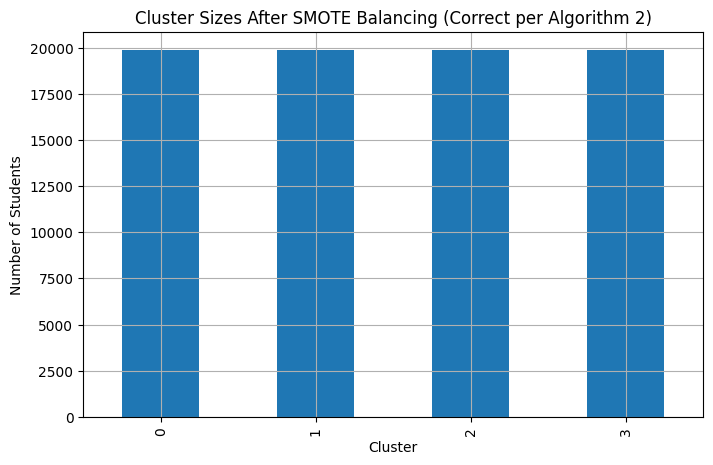

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
pd.Series(y_balanced).value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Sizes After SMOTE Balancing (Correct per Algorithm 2)')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

xp_features_df = xp_features_df.reset_index(drop=True)

print(" Columns before renaming:", xp_features_df.columns.tolist())

if 'label_x' in xp_features_df.columns:
    xp_features_df = xp_features_df.rename(columns={'label_x': 'label'})
elif 'label_y' in xp_features_df.columns:
    xp_features_df = xp_features_df.rename(columns={'label_y': 'label'})

if 'id_student_x' in xp_features_df.columns:
    xp_features_df = xp_features_df.rename(columns={'id_student_x': 'id_student'})

xp_features_df = xp_features_df.dropna(subset=['label'])

feature_cols = [col for col in xp_features_df.columns if col.startswith('xp_week_')]
X = xp_features_df[feature_cols]
y = xp_features_df['label']

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=1, random_state=42)
boruta_selector.fit(X.values, y)

selected_features = X.columns[boruta_selector.support_].tolist()
print("Selected Features by Boruta:")
print(selected_features)

X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    print(f"\n Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))




#  Step 1: Reset index
# Rename columns correctly if merged earlier
# Step 2: Debug column names and fix renaming
#  Step 3: Drop rows with missing labels
# Step 4: Select XP feature columns
#  Step 5: Apply Boruta feature selection
# Step 6: Get selected features
# Filter data with only selected features
#  Step 7: Train-test split
# Step 8: Define models/
#  Step 9: Train and evaluate models

 Columns before renaming: ['code_module', 'code_presentation', 'id_student', 'xp_week_0', 'xp_week_1', 'xp_week_2', 'xp_week_3', 'xp_week_4', 'xp_week_5', 'xp_week_6', 'xp_week_7', 'xp_week_8', 'xp_week_9', 'xp_week_10', 'xp_week_11', 'xp_week_12', 'xp_week_13', 'xp_week_14', 'xp_week_15', 'xp_week_16', 'xp_week_17', 'xp_week_18', 'xp_week_19', 'xp_week_20', 'xp_week_21', 'xp_week_22', 'xp_week_23', 'xp_week_24', 'xp_week_25', 'xp_week_26', 'xp_week_27', 'xp_week_28', 'xp_week_29', 'xp_week_30', 'xp_week_31', 'xp_week_32', 'xp_week_33', 'final_score', 'label', 'cluster']
Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 

In [84]:
print(" Columns right before dropping NA:", xp_features_df.columns.tolist())


 Columns right before dropping NA: ['code_module', 'code_presentation', 'id_student', 'xp_week_0', 'xp_week_1', 'xp_week_2', 'xp_week_3', 'xp_week_4', 'xp_week_5', 'xp_week_6', 'xp_week_7', 'xp_week_8', 'xp_week_9', 'xp_week_10', 'xp_week_11', 'xp_week_12', 'xp_week_13', 'xp_week_14', 'xp_week_15', 'xp_week_16', 'xp_week_17', 'xp_week_18', 'xp_week_19', 'xp_week_20', 'xp_week_21', 'xp_week_22', 'xp_week_23', 'xp_week_24', 'xp_week_25', 'xp_week_26', 'xp_week_27', 'xp_week_28', 'xp_week_29', 'xp_week_30', 'xp_week_31', 'xp_week_32', 'xp_week_33', 'final_score', 'label', 'cluster']


In [85]:
xp_features_df.head()

,code_module,code_presentation,id_student,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,xp_week_5,xp_week_6,...,xp_week_27,xp_week_28,xp_week_29,xp_week_30,xp_week_31,xp_week_32,xp_week_33,final_score,label,cluster
0,AAA,2013J,11391,704.0,57.5,171.5,51.5,95.5,5.0,52.0,...,52.0,1.0,0.0,247.0,1.0,0.0,0.0,82.0,A,3
1,AAA,2013J,28400,533.5,59.5,110.0,180.5,9.0,8.0,37.0,...,2.0,4.0,1.0,0.0,0.0,0.0,0.0,66.4,A,3
2,AAA,2013J,30268,276.5,49.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,D,0
3,AAA,2013J,31604,374.5,200.0,202.0,155.5,182.0,114.5,93.0,...,44.5,75.0,1.0,56.5,4.0,2.0,1.0,76.0,A,3
4,AAA,2013J,32885,568.0,286.5,164.0,28.5,92.0,0.0,0.0,...,91.0,74.5,24.0,7.5,0.0,0.0,0.0,54.4,B,3



 Evaluating using first 1 intervals
Naive Bayes Accuracy (interval 1): 0.6741
Random Forest Accuracy (interval 1): 0.6684
KNN Accuracy (interval 1): 0.6360

 Evaluating using first 2 intervals
Naive Bayes Accuracy (interval 2): 0.4752
Random Forest Accuracy (interval 2): 0.6184
KNN Accuracy (interval 2): 0.6304

 Evaluating using first 3 intervals
Naive Bayes Accuracy (interval 3): 0.4619
Random Forest Accuracy (interval 3): 0.6573
KNN Accuracy (interval 3): 0.6554

 Evaluating using first 4 intervals
Naive Bayes Accuracy (interval 4): 0.4660
Random Forest Accuracy (interval 4): 0.6758
KNN Accuracy (interval 4): 0.6631

 Evaluating using first 5 intervals
Naive Bayes Accuracy (interval 5): 0.4845
Random Forest Accuracy (interval 5): 0.6874
KNN Accuracy (interval 5): 0.6687

 Evaluating using first 6 intervals
Naive Bayes Accuracy (interval 6): 0.4498
Random Forest Accuracy (interval 6): 0.6966
KNN Accuracy (interval 6): 0.6793

 Evaluating using first 7 intervals
Naive Bayes Accuracy 

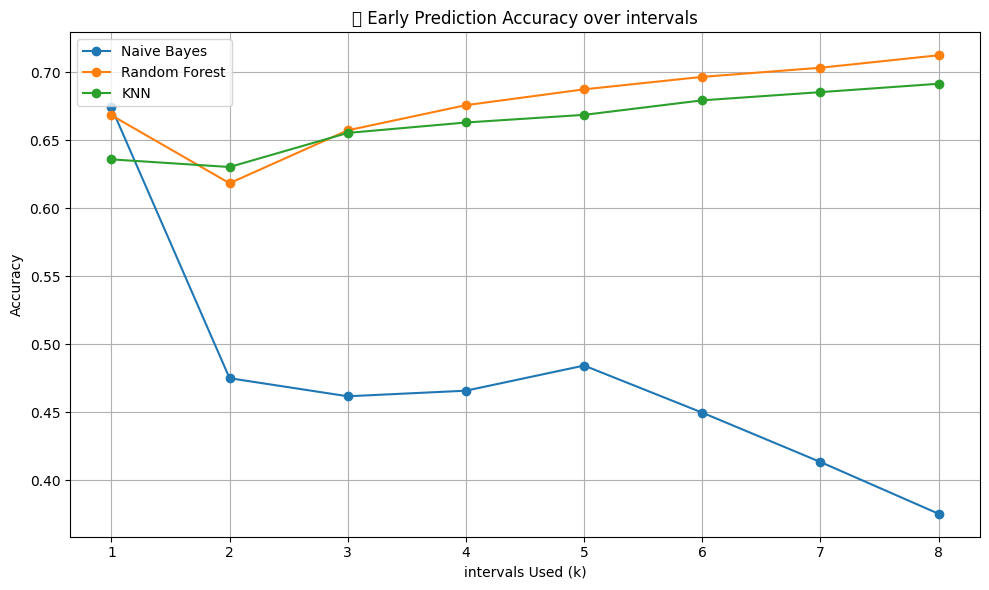

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Store results
early_results = {
    'Naive Bayes': [],
    'Random Forest': [],
    'KNN': []
}
weeks = list(range(1, 9))  # Weeks 1 to 8

#  Evaluate models week-by-week
for k in weeks:
    print(f"\n Evaluating using first {k} intervals")

    # Select only xp_week_1 to xp_week_k
    current_features = [f'xp_week_{i}' for i in range(1, k + 1)]

    # Select features and labels from xp_features_df
    X_curr = xp_features_df[current_features]
    y_curr = xp_features_df['label']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_curr, y_curr, test_size=0.25, random_state=42, stratify=y_curr
    )

    # Train and evaluate all 3 models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        early_results[name].append(acc)
        print(f"{name} Accuracy (interval {k}): {acc:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
for name, accs in early_results.items():
    plt.plot(weeks, accs, marker='o', label=name)

plt.title("📈 Early Prediction Accuracy over intervals")
plt.xlabel("intervals Used (k)")
plt.ylabel("Accuracy")
plt.xticks(weeks)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
